In [ ]:
!pip install pycountry
!pip install bar_chart_race

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#EC449B;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:White;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Attention
</h2>

<p style="padding: 10px;
           color:#99F443;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
Please wait untill notebook fully loads because it contains video and takes approximate one minute to load(keep refreshing the page after 30 seconds)
</p>

</div>

# Loading Datasets

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#EC449B;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:White;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Loading and Merging Datasets
</h2>

<p style="padding: 10px;
           color:#99F443;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this initial part of the notebook, we're importing the necessary Python libraries required for our analysis, such as pandas, numpy, matplotlib, seaborn, and pycountry. Following this, we're loading the transfers, teams, and players datasets from our data source. Once loaded, we're merging these datasets to have all the relevant information in a single DataFrame. This enables us to carry out our transfers analysis more efficiently. After merging, the first few rows of our consolidated transfers data is displayed for initial inspection.
</p>

</div>

In [12]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import pycountry
from IPython.display import HTML
import matplotlib.animation as animation

# Load the data
transfers = pd.read_csv('../input/world-volleyball-data-players-teams-and-more/transfers.csv')
teams = pd.read_csv('../input/world-volleyball-data-players-teams-and-more/teams.csv')
players = pd.read_csv('../input/world-volleyball-data-players-teams-and-more/players.csv')

# Merge the data
transfers = transfers.merge(teams, left_on='new_team_id', right_on='team_id', how='left')
transfers = transfers.rename(columns={'team_name': 'new_team_name'})
transfers = transfers.merge(teams, left_on='old_team_id', right_on='team_id', how='left')
transfers = transfers.rename(columns={'team_name': 'old_team_name'})
transfers = transfers.merge(players, left_on='player_name', right_on='name', how='left')

# Display the first few rows of the data
transfers.head()

transfer_id           player_name first_name     last_name  date  \
0            1         Thiago Maciel     Thiago        Maciel  2010   
1            2   Oleksandr Statsenko  Oleksandr     Statsenko  2010   
2            3  Dante Elias Trevisan      Dante      Trevisan  2010   
3            4   Robert Szczerbaniuk     Robert  Szczerbaniuk  2010   
4            5      Arash Keshavarzi      Arash    Keshavarzi  2010   

  old_team_id new_team_id team_id_x    new_team_name country_code_x  ...  \
0       t2579       t1454     t1454      CV Zaragoza             ES  ...   
1       t1617         NaN       NaN              NaN            NaN  ...   
2       t1517       t1309     t1309  Al Gharafa S.C.             QA  ...   
3         NaN         NaN       NaN              NaN            NaN  ...   
4       t1753       t2398     t2398  Damash Gilan VC             IR  ...   

     town_y  founded_y player_id                  name ranking weight  \
0   Vitória         \r     p2145         Thiago Maciel  4246.0   89.0   
1   Kharkiv       1973     p1196   Oleksandr Statsenko  2572.0   88.0   
2  Carolina       2002     p3310  Dante Elias Trevisan  3314.0   90.0   
3       NaN        NaN       NaN                   NaN     NaN    NaN   
4    Tehran       1967     p3307      Arash Keshavarzi  3063.0   94.0   

         position  height  country_code   birthdate  
0        Opposite   197.0            BR    5/7/1985  
1        Opposite   200.0            UA  11/10/1983  
2  Outside Hitter   203.0            BR   3/27/1981  
3             NaN     NaN           NaN         NaN  
4  Outside Hitter   197.0            IR   2/16/1987  

[5 rows x 29 columns]

In [3]:
def get_country_name(code):
    try:
        name = pycountry.countries.get(alpha_2=code).name
    except:
        if code == "UAE":
            name = "United Arab Emirates"
        else:
            name = 'Unknown'
    return name

# Transfers Over Time

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#EC449B;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:White;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Visualizing Transfers Over Time
</h2>

<p style="padding: 10px;
           color:#99F443;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this part of the notebook, we are preparing our data for a visualization that will depict the number of player transfers over time per country. To do this, we group our dataset by the transfer date and the country of the new team, then count the number of transfers for each combination. After inserting NaN values to improve the smoothness of the upcoming animation, we interpolate these missing values based on the existing data. Once this preparation is complete, we generate an animation that shows a bar chart for each year in our data, with each bar representing a country and its height representing the number of transfers to that country in that year. This dynamic visualization will help us understand the trends and patterns in player transfers across different countries over the years.
</p>

</div>

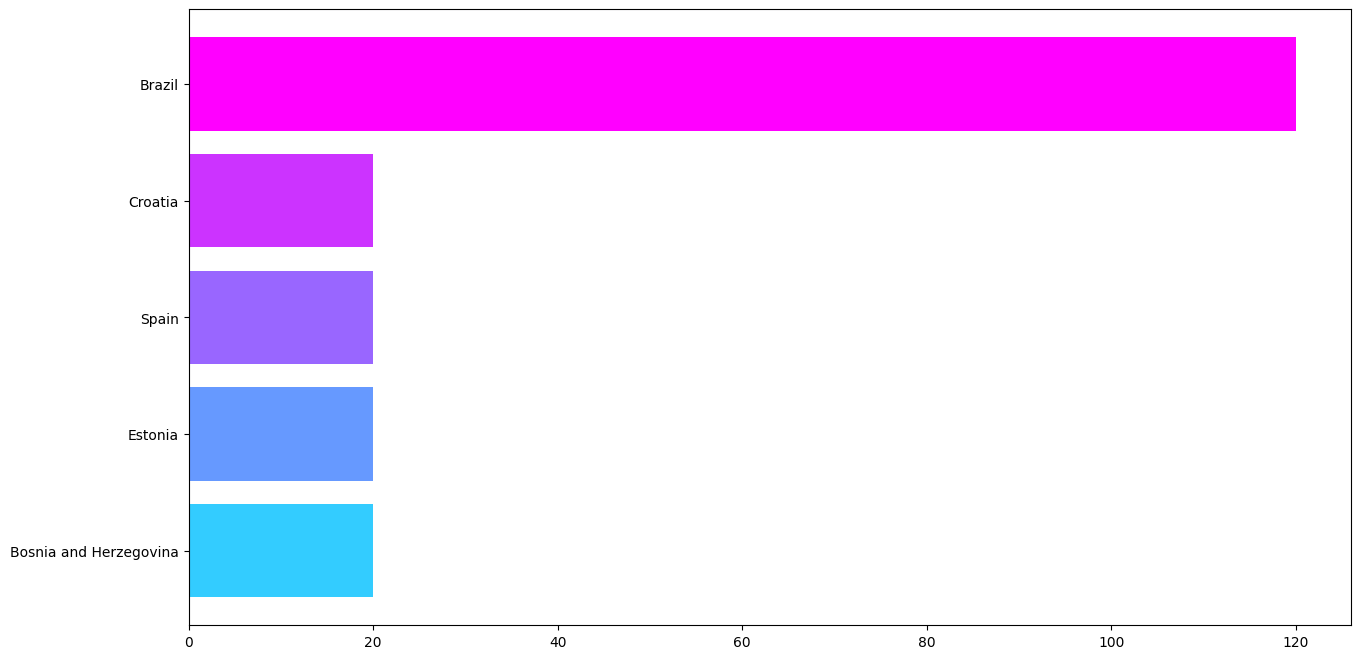

In [5]:

transfers2 = transfers.copy()
annual_transfers = transfers2.groupby(['date', 'country_code']).size().unstack(fill_value=0)
columns = annual_transfers.columns

# Insert 50 NaN rows between each year
new_rows = []
for year, row in annual_transfers.iterrows():
    new_rows.append(list(row.values))
    for _ in range(14):
        new_rows.append([np.nan] * len(row))

# Create a new DataFrame with the updated rows
new_df = pd.DataFrame(new_rows, columns=annual_transfers.columns)

# Reset the index
new_df.reset_index(drop=True, inplace=True)
new_df = new_df.interpolate(method='linear', axis=0)
annual_transfers = new_df

# Select the top countries for each frame
top_countries = annual_transfers.apply(lambda x: x.nlargest(5).index, axis=1)

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(15, 8))

# Update the animation function
def draw_barchart(year):
    d = annual_transfers.loc[year].loc[top_countries[year]].sort_values(ascending=True)
    ax.clear()
    cmap = plt.cm.get_cmap('cool')  # Choose a color map
    colors = cmap(np.linspace(0.2, 1, len(d)))  # Generate a gradient of colors
    country_names = [get_country_name(code) for code in d.index]
    ax.barh(country_names, d, color=colors)
        
# Create an animation
animator = animation.FuncAnimation(fig, draw_barchart, frames=annual_transfers.index)

# Convert the animation to HTML and display it
HTML(animator.to_jshtml())

# Top Teams in Terms of Total Transfers

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#EC449B;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:White;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Visualizing Top Teams in Terms of Total Transfers
</h2>

<p style="padding: 10px;
           color:#99F443;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this segment of the notebook, we delve into the analysis of teams based on the total number of player transfers. We begin by counting the number of outgoing and incoming transfers per team. After determining these counts, we combine the two to get the total transfers for each team. From these total transfers, we identify the top 10 teams with the highest number of transfers. This data is then visualized using a circular bar plot, commonly known as a radial bar plot, where each bar represents one of the top 10 teams and its height signifies the number of total transfers. This unique and captivating visualization provides insights into which teams are the most active in the transfer market.
</p>

</div>

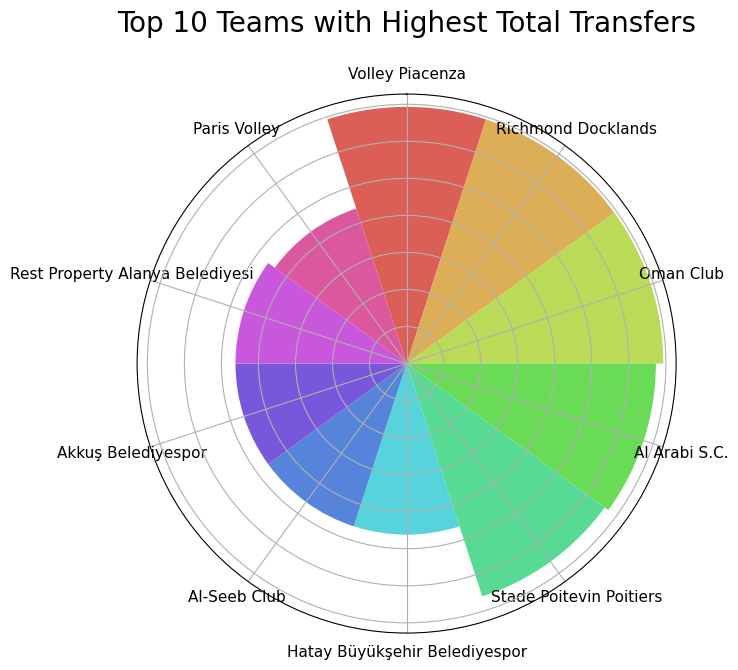

In [6]:
# Find the number of outgoing transfers per team
outgoing_transfers = transfers['old_team_name'].value_counts()

# Find the number of incoming transfers per team
incoming_transfers = transfers['new_team_name'].value_counts()

# Combine the outgoing and incoming transfers to get total transfers per team
total_transfers = outgoing_transfers.add(incoming_transfers, fill_value=0).astype(int)
# Top 10 teams with the highest total transfers
top_teams = total_transfers.sort_values(ascending=False).head(10)

# Number of bars
n_bars = len(top_teams)

# Create the figure and polar projection
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='polar')

# Compute width of each bar
width = (2*np.pi) / n_bars

# Generate sequence of numbers from 0 to 2*pi
theta = np.linspace(0.0, 2 * np.pi, n_bars, endpoint=False)

# Plot bars
bars = ax.bar(theta, top_teams.values, width=width, color=sns.color_palette("hls", n_bars))

# Customize the plot
ax.set_yticklabels([])
ax.set_xticks(theta)
ax.set_xticklabels(top_teams.index, fontsize=11, color='black')

# Make the labels go clockwise
ax.set_theta_direction(-1)

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)

plt.title('Top 10 Teams with Highest Total Transfers', size=20, color='black', y=1.1)

# Show the plot
plt.show()

# Most Traded Players

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#EC449B;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:White;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Visualizing the Most Traded Players
</h2>

<p style="padding: 10px;
           color:#99F443;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this part of the notebook, we shift our focus to individual players. Specifically, we are interested in identifying the most traded players in the dataset. To do this, we count the number of times each player appears in our transfers dataset. From this count, we take the top 10 players with the most transfers. The data is visualized using a treemap, where each square represents a player and its size indicates the number of transfers for that player. The colors are assigned from a gradient created using the viridis colormap. This visualization provides a clear and intuitive understanding of which players are the most traded in the volleyball world.
</p>

</div>

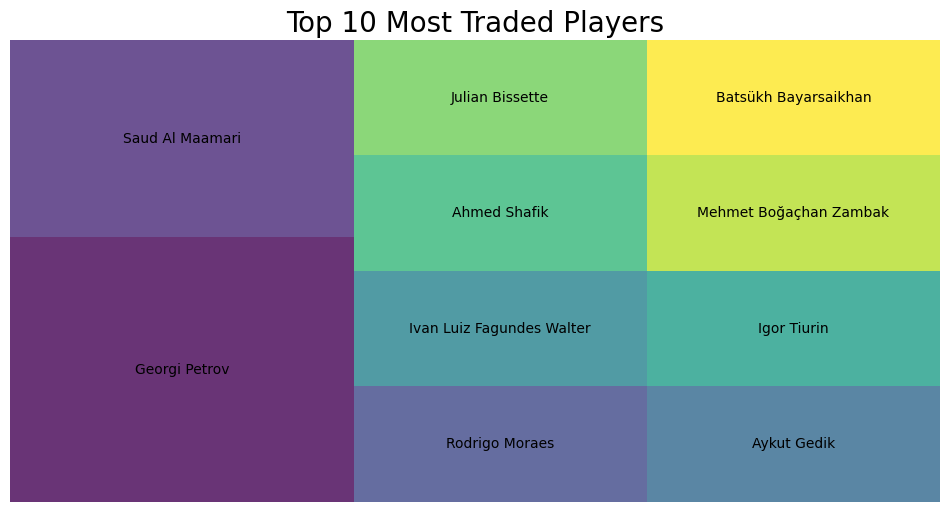

In [7]:
import squarify 
# Visualize the most traded players
player_transfers = transfers['player_name'].value_counts()
# Get top 10 most traded players
top_players = player_transfers.head(10)

# Create a color gradient using viridis
colors = plt.cm.viridis(np.linspace(0, 1, len(top_players)))

# Create a figure with custom size
fig = plt.figure(figsize=(12, 6))

# Create the treemap
squarify.plot(sizes=top_players.values, label=top_players.index, color=colors, alpha=0.8)

# Remove the axis
plt.axis('off')

# Add a title
plt.title('Top 10 Most Traded Players', fontsize=20)

# Display the plot
plt.show()

# Transfer Activity Over the Years

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#EC449B;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:White;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Visualizing Transfer Activity Over the Years
</h2>

<p style="padding: 10px;
           color:#99F443;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this segment of the notebook, we analyze the trend of player transfers over the years. We first convert the date column into a datetime object and then extract the year from it. We count the number of transfers per year and plot these counts in a line chart, with the color of each segment indicating the number of transfers that year. This approach allows us to create a color-coded visualization of transfer activity over the years, where the height of the line signifies the number of transfers, and the color intensity indicates the number of transfers in that year relative to other years. The plot is accompanied by a color bar, which acts as a legend for the color mapping, thereby enhancing the interpretability of the visualization.
</p>

</div>

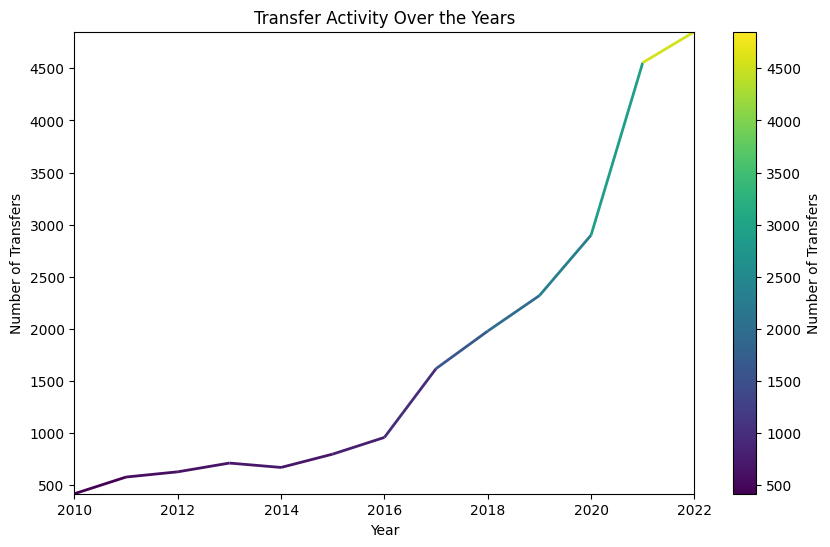

In [8]:
# Convert 'date' column to integer and then convert it to datetime, assuming it's the year
transfers['date'] = pd.to_datetime(transfers['date'].astype(int), format='%Y')

# Extract the year from the date
transfers['year'] = transfers['date'].dt.year

# Count the number of transfers per year
yearly_transfers = transfers['year'].value_counts().sort_index()

# Create a set of line segments (we dont use 2023 because the data isnt complete yet)
x = yearly_transfers.index.values[:-1]
y = yearly_transfers.values[:-1]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(y.min(), y.max())

# Create a LineCollection object
lc = LineCollection(segments, cmap='viridis', norm=norm)

# Set the values used for colormapping
lc.set_array(y)
lc.set_linewidth(2)

fig, ax = plt.subplots(figsize=(10, 6))

# Add the line collection to the plot
ax.add_collection(lc)

# Set the limits of the plot
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.title('Transfer Activity Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Transfers')

# Add a colorbar
cbar = plt.colorbar(lc)
cbar.set_label('Number of Transfers')

plt.show()

# Transfers by Countries

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#EC449B;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:White;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Analyzing Transfers by Countries
</h2>

<p style="padding: 10px;
           color:#99F443;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this section of the notebook, we're investigating the distribution of volleyball transfers between countries. We count the number of transfers for both incoming and outgoing teams per country. These counts are then merged into a single DataFrame and sorted by the total number of transfers. The result is visualized through a dual horizontal bar chart, one depicting the incoming transfers for each country and the other showcasing outgoing transfers. This enables us to easily compare the volleyball transfer activity between countries. Green bars represent incoming transfers, whereas red bars depict outgoing transfers, facilitating a clear differentiation between the two.
</p>

</div>

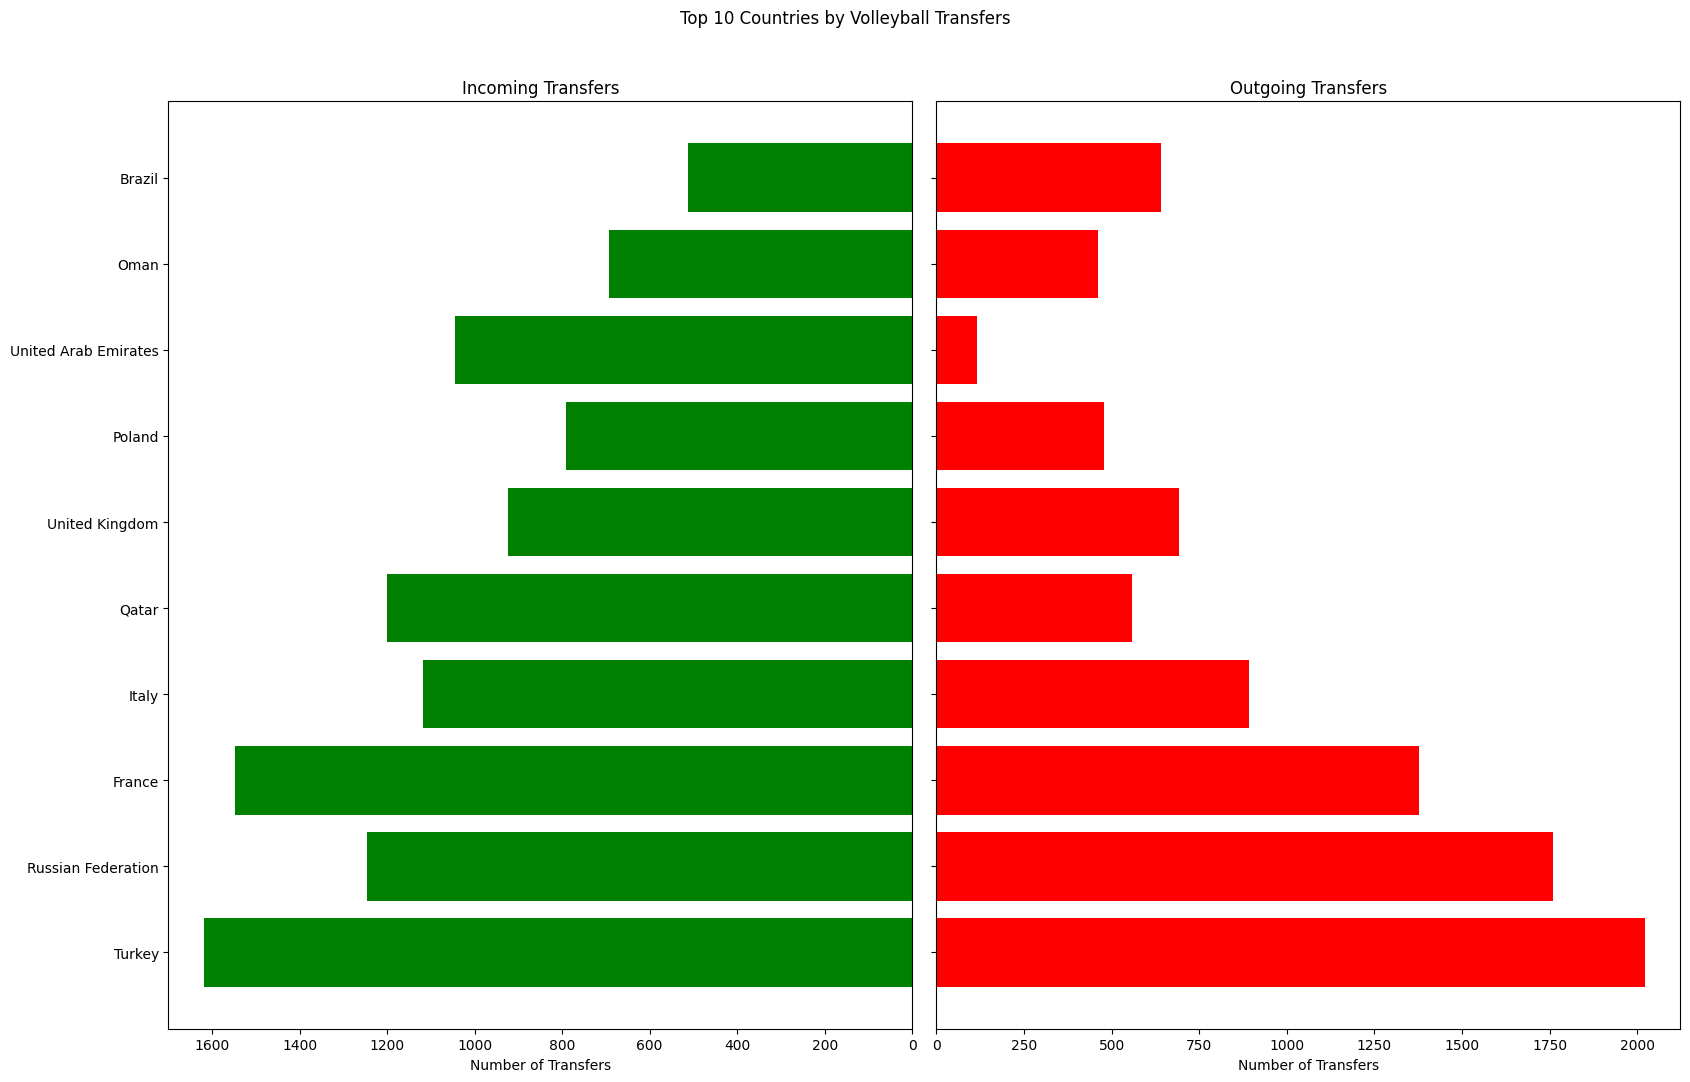

In [9]:
import numpy as np
# Get the count of transfers per country for old and new teams
transfer_countries_old = transfers['country_code_x'].value_counts()
transfer_countries_new = transfers['country_code_y'].value_counts()

# Combine both Series into a DataFrame
transfer_countries = pd.concat([transfer_countries_old, transfer_countries_new], axis=1, keys=['New', 'Old'])

# Calculate total transfers by summing along rows
transfer_countries['Total'] = transfer_countries.sum(axis=1)

# Add a column for country names
transfer_countries['country_name'] = transfer_countries.index.map(get_country_name)
transfer_countries = transfer_countries.sort_values(by='Total', ascending=False)
# Get the top 10 countries by total transfers
top10_countries = transfer_countries.sort_values(by='Total', ascending=False).head(10)

fig, ax = plt.subplots(1, 2, figsize=(17,11), sharey=True)

# Plot incoming transfers
ax[0].barh(top10_countries['country_name'], top10_countries['New'], color='green')
ax[0].set_title('Incoming Transfers')
ax[0].set_xlabel('Number of Transfers')
ax[0].invert_xaxis()
ax[0].set(yticks=np.arange(len(top10_countries)), yticklabels=top10_countries['country_name'])

# Plot outgoing transfers
ax[1].barh(top10_countries['country_name'], top10_countries['Old'], color='red')
ax[1].set_title('Outgoing Transfers')
ax[1].set_xlabel('Number of Transfers')
ax[1].set(yticks=np.arange(len(top10_countries)), yticklabels=top10_countries['country_name'])

# Common settings
plt.suptitle('Top 10 Countries by Volleyball Transfers')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # to ensure the suptitle fits into the figure
plt.show()

# Transfer Ages

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#EC449B;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:White;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Distribution of Transfer Ages
</h2>

<p style="padding: 10px;
           color:#99F443;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
Next, we delve into the age aspect of player transfers. Initially, we calculate the age of each player at the time of their transfer. Following this, we illustrate the distribution of these transfer ages using a histogram with kernel density estimation (KDE). The histogram is divided into 30 bins for a more precise view of the age distribution. Utilizing seaborn's color palette, we create a cooler and visually appealing aesthetic for the histogram. This detailed visual allows us to understand better the common age ranges at which players tend to transfer.
</p>

</div>

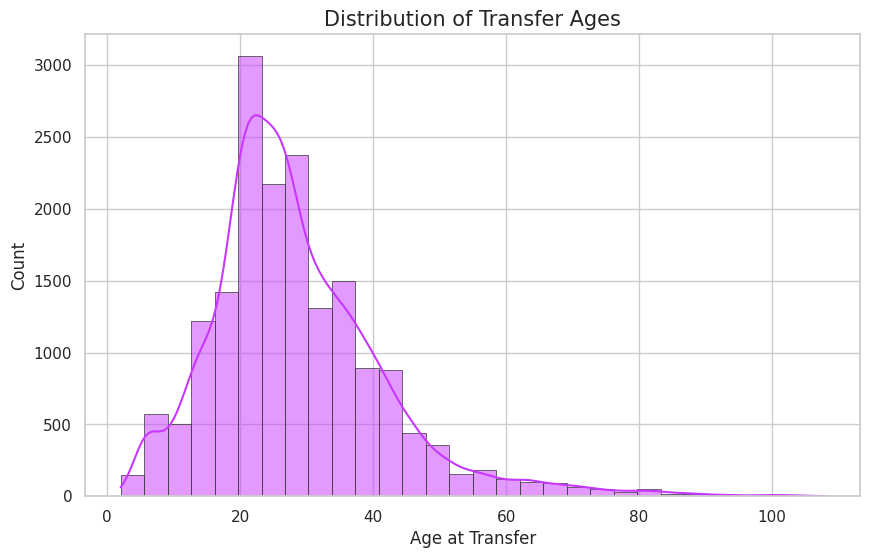

In [10]:
# Use seaborn's style settings for better aesthetics
sns.set(style='whitegrid')

# Calculate age at the time of transfer
transfers['birthdate'] = pd.to_datetime(players['birthdate'])
transfers['transfer_age'] = transfers['year'] - transfers['birthdate'].dt.year

# Create a color palette
palette = sns.color_palette("cool", as_cmap=True)

# Plot the distribution of transfer ages
plt.figure(figsize=(10, 6))
sns.histplot(transfers['transfer_age'].dropna(), bins=30, color=palette(200), kde=True, linewidth=0.5, edgecolor=".2")

plt.title('Distribution of Transfer Ages', size=15)
plt.xlabel('Age at Transfer', size=12)
plt.ylabel('Count', size=12)
plt.show()